## Inicializacion

### Importado de librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Carga de datos

In [ ]:
# Cargar los datos desde los archivos
df_estudiantes = pd.read_csv("./archivos-bd/BaseAprenderEstudiantes6Primaria2022-MuestralLyM.csv", sep=';')
df_referencias = pd.read_excel("./archivos-bd/EstudiantesAPRENDER2022PrimariaMuestral-DiccionarioDeVariables.xlsx", sheet_name="etiquetas de variables", header=1)
df_valores_variables = pd.read_excel("./archivos-bd/EstudiantesAPRENDER2022PrimariaMuestral-DiccionarioDeVariables.xlsx", sheet_name="valores de variables", header=1)

### Análisis Exploratorio de Datos

In [ ]:
print(df_estudiantes.shape)
print(df_referencias.shape)
print(df_valores_variables.shape)

In [ ]:
df_estudiantes.head()

In [ ]:
df_referencias.head()

In [ ]:
df_valores_variables.head(28)

In [ ]:
# Transformar el dataframe de referencias a una Serie para poder buscar por el nombre de la variable más facil
df_referencias = df_referencias.set_index(df_referencias.columns[0]).squeeze()

In [ ]:
# Reformatear dataframe estudiantes

# Eliminar columnas que no son necesarias en el trabajo practico
columnas_a_eliminar = [ "idalumno", "sector", "ap02", "ap03", "ap04", "ap05", "ap06", "ap07", "ap08",
                        "ap09", "ap10a", "ap10b", "ap10c", "ap10d", "ap10e", "ap10f", "ap10g", "ap10h",
                        "ap10i", "ap10j", "ap11", "ap12a", "ap12b", "ap12c", "ap12e", "ap12f",
                        "ap12g", "ap12h", "ap12i", "ap12j", "ap12k", "ap12l", "ap13", "ap14", "ap15",
                        "ap16", "ap17a", "ap17b", "ap17c", "ap17d", "ap17e", "ap18a", "ap18b", "ap18c",
                        "ap18d", "ap18e", "ap19a", "ap19b", "ap19c", "ap19d", "ap19e", "ap20a", "ap20b",
                        "ap21a", "ap21b", "ap21c", "ap21d", "ap21e", "ap21f", "ap22", "ap23", "ap24",
                        "ap25a", "ap25b", "ap25c", "ap25d", "ap25e", "ap25f", "ap25g", "ap25h", "ap25i",
                        "ap25j", "ap26a", "ap26b", "ap26c", "ap26d", "ap26e", "ap26f", "ap26g", "ap26h", 
                        "ap26i", "ap26j", "ap27", "ap28a", "ap28b", "ap28c", "ap28d", "ap29", "ap30",
                        "ap31", "ap32a", "ap32b", "ap33a", "ap33b", "ap34", "ap35", "edadA_junio2022", "sobreedad",
                        "migracion", "Nivel_Ed_Madre", "Nivel_Ed_Padre", "Nivel_Ed_Persona_Resp"]

df_estudiantes = df_estudiantes.drop(labels=columnas_a_eliminar, axis=1)
df_referencias = df_referencias.drop(columnas_a_eliminar)

In [ ]:
df_estudiantes.head(10)

In [ ]:
# Reformatear dataframe valores variables

# Rellenar las columnas que tienen valores NaN por la variable correspondiente
for index, _ in enumerate(df_valores_variables["Variable"]):
    if index != 0:
        # Si estoy en un valor NaN y el anterior tiene un valor significa que debe tener el mismo valor que el anterior
        if pd.isnull(df_valores_variables["Variable"][index]) and not pd.isnull(df_valores_variables["Variable"][index-1]):
            df_valores_variables["Variable"][index] = df_valores_variables["Variable"][index-1]

df_valores_variables.head(30)

In [ ]:
# Recorremos las columnas para saber si hay elementos nulos en las columnas del dataframe
print(df_estudiantes.isnull().sum()) # Trunca el resultado

# Según este análisis ninguna columna tienen valores nulos pero analizando un poco mas a fondo observamos
# que hay columnas que tienen como valor un string vacio o un espacio " " por lo que se debe considerar
# como se tratarán estos caso
print(df_estudiantes["ap01"].unique())

#! Se debe tener especial cuidado porque en la misma columna hay variables del tipo int y string
#! que representan lo mismo

In [ ]:
# Definir una funcion para saber que indices nos sirven y que valor de refencia tienen
def buscar_referencias(nombre_referencia):
    return df_referencias[df_referencias.str.contains(nombre_referencia)]


## Practica para todas las muestras

### 1 - Graficar, en un mismo plano, la proporción de muestras con y sin acceso a internet.

In [ ]:
# Para saber que variables hacen refencia a "Internet" utilizamos la función buscar_referencias
referencias_a_internet = buscar_referencias("Internet")

print(referencias_a_internet)

print(referencias_a_internet.values[0])
print(referencias_a_internet.index[0])

# Por lo que determinamos que la variable que analizaremos será "ap12d": "¿Disponés de los siguientes objetos o servicios en el lugar donde vivís? [Conexión a Internet]""
print(df_estudiantes["ap12d"].unique())

#### Conversion y limpieza de datos

Mediante la observación manual de los datos, nos dimos cuenta de que el dataset no tiene de por sí variables categóricas porque todas estan mapeadas a valores enteros, sin embargo, como se verá más adelante, hay columnas del dataframe que contiene espacios y que tienen numeros y strings que representan lo mismo

In [ ]:
def normalizar_categoricas(param):
    if isinstance(param, str):
        if param.isspace() or param == "":
            return int(param.replace(" ", "-9"))
        else:
            return int(param)
    else:
        return param

df_estudiantes["ap12d"] = df_estudiantes["ap12d"].map(normalizar_categoricas)

df_estudiantes["ap12d"].unique()

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

etiquetas = {
    1: 'Sí',
    2: 'No'
}

conteo_valores = df_estudiantes['ap12d'].value_counts()
conteo_valores = conteo_valores.drop(conteo_valores.index[[1, 3, 4]])

print(conteo_valores)

# Obtener los valores y etiquetas
valores = conteo_valores.values
etiquetas_pie = [etiquetas[valor] for valor in conteo_valores.index]

# Crear el gráfico de pie
plt.title(
    'Proporción de estudiantes con acceso a internet',
    fontdict={"fontsize": 16})
handles = plt.pie(
    valores, 
    labels=etiquetas_pie, 
    autopct='%1.1f%%', 
    startangle=90,
    textprops={"fontsize": 13})
fig.set_facecolor('white')

plt.show()


### 2 - Informar el porcentaje de estudiantes mayores de 13 años.

In [ ]:
referencias_a_años = buscar_referencias("años")

print(referencias_a_años)

# Por lo que determinamos que la variable que analizaremos será "ap01": "¿Cuántos años tenés?"
print(df_referencias["ap01"])

print(df_estudiantes["ap01"].unique())

In [ ]:
df_estudiantes["ap01"] = df_estudiantes["ap01"].map(normalizar_categoricas)

df_estudiantes["ap01"].unique()

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

etiquetas = {
    'menor13': 'Alumnos menores de 13 años',
    'mayor13': 'Alumnos de 13 o más años'
}

conteo_valores = df_estudiantes["ap01"].value_counts().sort_index()

# Obtener los valores y etiquetas
valores = pd.Series([conteo_valores.iloc[0:6].sum(), conteo_valores.iloc[6:].sum()], index=["menor13", "mayor13"])
print(valores)
etiquetas_pie = [etiquetas[valor] for valor in valores.index]

plt.title(
    'Porcentaje de estudiantes mayores de 13 años',
    fontdict={"fontsize": 16})

# Crear el gráfico de pie
handles = plt.pie(
    valores, 
    labels=etiquetas_pie, 
    autopct='%1.1f%%',
    startangle=90,
    textprops={"fontsize": 13})
fig.set_facecolor('white')

plt.show()

### 3 -  Graficar, en un mismo plano, las proporciónes de muestras de las 10 jurisdicciones con mayor cantidad de estudiantes.

In [ ]:
print(df_referencias["jurisdiccion"])

print(df_estudiantes["jurisdiccion"].unique())

# Agrupar con jurisdiccion y sumar para ver si se consideran todos los valores, la suma debe dar igual a 128482
df_estudiantes["jurisdiccion"].value_counts().values.sum()

In [ ]:
# Armar una Serie que contenga el valor de la provincia como key y el nombre como value
df_jurisdiccion = df_valores_variables[df_valores_variables["Variable"] == "jurisdiccion"]
df_jurisdiccion_sin_columna_variable = df_jurisdiccion.drop("Variable", axis=1)
valores_etiqueta = df_jurisdiccion_sin_columna_variable.set_index(df_jurisdiccion_sin_columna_variable.columns[0]).squeeze()

# Acortar nombre CABA
valores_etiqueta[2] = "CABA"

valores_etiqueta.values

In [ ]:
# Reemplazar los valores por su correspondiente provincia
cantidad_estudiantes_por_jurisdiccion = df_estudiantes["jurisdiccion"].value_counts()

cantidad_estudiantes_por_jurisdiccion.index = cantidad_estudiantes_por_jurisdiccion.index.map(valores_etiqueta)

# Tomar las 10 jurisdicciones con mayor poblacion
cantidad_estudiantes_por_jurisdiccion = cantidad_estudiantes_por_jurisdiccion.iloc[:10]

cantidad_estudiantes_por_jurisdiccion


In [ ]:
# Crear un gráfico de barras horizontales
plt.barh(cantidad_estudiantes_por_jurisdiccion.index, cantidad_estudiantes_por_jurisdiccion.values)

# Etiquetas y título
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Jurisdicción')
plt.title('Cantidad de Estudiantes por Jurisdicción')

# Mostrar el gráfico
plt.show()

### 4 - Graficar, en un mismo plano, la proporción de muestras con residencia rural y urbana.

In [ ]:
# Encontrar que variable hacia referencia a si el ámbito era rural o urbano fue más dificil porque no había una relación directa
# en el dataframe de referencia por lo que su obtención se hizo mediante la observación manual

print(df_valores_variables[df_valores_variables["Variable"] == "ambito"])
print(df_estudiantes["ambito"].unique())

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

etiquetas = {
    1: "Rural",
    2: "Urbano"
}

plt.title('Proporción de estudiantes con residencia rural y urbana',
    fontdict={"fontsize": 16})

conteo_valores = df_estudiantes['ambito'].value_counts()

# Obtener los valores y etiquetas
valores = conteo_valores.values
etiquetas_pie = [etiquetas[valor] for valor in conteo_valores.index]

# Crear el gráfico de pie
handles = plt.pie(valores, 
                  labels=etiquetas_pie, 
                  autopct='%1.1f%%',
                  startangle=90,
                  textprops={"fontsize": 13})
fig.set_facecolor('white')

# plt.legend(zip(etiquetas.values(), valores), title="Etiquetas y valores", loc="upper right")

plt.show()

## Para las muestras correspondientes a la provincia de Santa Fe:

### 6 - Informar el promedio de los puntajes en matemática y lengua.

In [ ]:
# Se define el dataframe para solamente quedarnos con los estudiantes que sean de la provincia de santa fe
df_estudiantes_santafesinos = df_estudiantes[df_estudiantes["jurisdiccion"] == 82]
df_estudiantes_santafesinos

### 7 - Graficar el desempeño en matemática y lengua en dos categorias: una para el nivel POR DEBAJO DEL BÁSICO, otra para los niveles BÁSICO, SATISFACTORIO y AVANZADO.

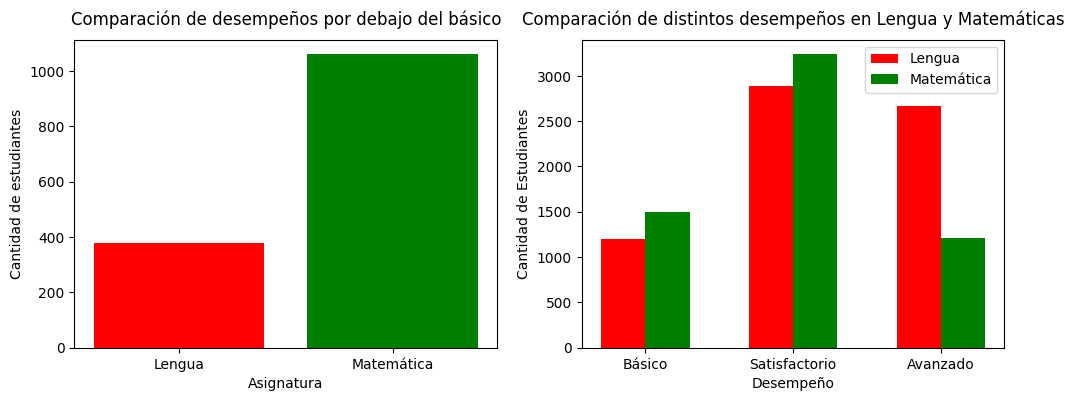

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
# ---------------------------------- Categoría 1 ----------------------------------
# Desempeños en lengua POR DEBAJO DEL BÁSICO
filtro_pordebajo_leng = (df_estudiantes_santafesinos['ldesemp'] == "1")
lengua_pordebajo = df_estudiantes_santafesinos[filtro_pordebajo_leng]

# Desempeños en matematica POR DEBAJO DEL BÁSICO
filtro_pordebajo_mat = (df_estudiantes_santafesinos['mdesemp'] == "1")
matematica_pordebajo = df_estudiantes_santafesinos[filtro_pordebajo_mat]

# Cantidad de estudiantes con desempeño POR DEBAJO DEL BÁSICO
cant_pordebajo_leng = len(lengua_pordebajo)
cant_pordebajo_mat = len(matematica_pordebajo)

 # Gráfico de barras
categorias = ['Lengua', 'Matemática']
cantidad_estudiantes_pordebajo = [cant_pordebajo_leng, cant_pordebajo_mat] 
colores = ['red', 'green']
ax1.bar(categorias, cantidad_estudiantes_pordebajo, color=colores)
ax1.set_xlabel('Asignatura')
ax1.set_ylabel('Cantidad de estudiantes')
ax1.text(0.5, 1.05, 'Comparación de desempeños por debajo del básico', fontsize=12, ha='center', transform=ax1.transAxes)

# ---------------------------------- Categoría 2 ----------------------------------
# Desempeños en lengua BÁSICO
filtro_basico_leng = (df_estudiantes_santafesinos['ldesemp'] == "2")
lengua_basico = df_estudiantes_santafesinos[filtro_basico_leng]

# Desempeños en matematica BÁSICO
filtro_basico_mat = (df_estudiantes_santafesinos['mdesemp'] == "2")
matematica_basico = df_estudiantes_santafesinos[filtro_basico_mat]

# Desempeños en lengua SATISFACTORIO
filtro_satisf_leng = (df_estudiantes_santafesinos['ldesemp'] == "3")
lengua_satisf = df_estudiantes_santafesinos[filtro_satisf_leng]

# Desempeños en matematica SATISFACTORIO
filtro_satisf_mat = (df_estudiantes_santafesinos['mdesemp'] == "3")
matematica_satisf = df_estudiantes_santafesinos[filtro_satisf_mat]

# Desempeños en lengua AVANZADO
filtro_avanzado_leng = (df_estudiantes_santafesinos['ldesemp'] == "4")
lengua_avanzado = df_estudiantes_santafesinos[filtro_avanzado_leng]

# Desempeños en matematica AVANZADO
filtro_avanzado_mat = (df_estudiantes_santafesinos['mdesemp'] == "4")
matematica_avanzado = df_estudiantes_santafesinos[filtro_avanzado_mat]

# Cantidad de estudiantes
cant_basico_leng = len(lengua_basico)
cant_basico_mat = len(matematica_basico)
cant_satisf_leng = len(lengua_satisf)
cant_satisf_mat = len(matematica_satisf)
cant_avanzado_leng = len(lengua_avanzado)
cant_avanzado_mat = len(matematica_avanzado)

# Gráfico
categorias2 = ['Básico', 'Satisfactorio', 'Avanzado']
cant_estudiantes_lengua = [cant_basico_leng, cant_satisf_leng, cant_avanzado_leng]
cant_estudiantes_matematica = [cant_basico_mat, cant_satisf_mat, cant_avanzado_mat]
bar_width = 0.3
bar_positions = range(len(categorias2))
ax2.bar([pos - bar_width/2 for pos in bar_positions], cant_estudiantes_lengua, bar_width, label='Lengua', color = 'red')
ax2.bar([pos + bar_width/2 for pos in bar_positions], cant_estudiantes_matematica, bar_width, label='Matemática', color='green')
ax2.set_xlabel('Desempeño')
ax2.set_ylabel('Cantidad de Estudiantes')
ax2.set_xticks(bar_positions, categorias2)
ax2.text(0.5, 1.05, 'Comparación de distintos desempeños en Lengua y Matemáticas', fontsize=12, ha='center', transform=ax2.transAxes)
plt.legend()

# ----- Mostrar -----
plt.show()

### 8 - Generar un archivo JSON

In [42]:
import json

# Extracción de Columnas
informacion_json = df_estudiantes_santafesinos[['mdesemp', 'ldesemp', 'ambito', 'ap01']]

# Quitar filas con datos vacios
informacion_json = informacion_json[informacion_json['mdesemp'] != ' ']
informacion_json = informacion_json[informacion_json['ldesemp'] != ' ']
informacion_json = informacion_json[informacion_json['ap01'] != ' ']

# Filtrar edad
# VER - En el enunciado la columna se llama mayor12, pero pide poner como True a los que tengan más de 10 años 
informacion_json['ap01'] = informacion_json['ap01'].astype(int)
informacion_json['ap01'] = np.where(informacion_json['ap01'] >=2, True, False)

# Filtrar desempeño - Lengua
# VER - Qué hacer con valores en blanco
informacion_json.loc[informacion_json.ldesemp == "1", ['ldesemp']] = "BAJO"
informacion_json.loc[informacion_json.ldesemp == "2", ['ldesemp']] = "BASICO"
informacion_json.loc[informacion_json.ldesemp == "3", ['ldesemp']] = "SATISFACTORIO"
informacion_json.loc[informacion_json.ldesemp == "4", ['ldesemp']] = "AVANZADO"

# Filtrar desempeño - Matemática
# VER - Qué hacer con valores en blanco
informacion_json.loc[informacion_json.mdesemp == "1", ['mdesemp']] = "BAJO"
informacion_json.loc[informacion_json.mdesemp == "2", ['mdesemp']] = "BASICO"
informacion_json.loc[informacion_json.mdesemp == "3", ['mdesemp']] = "SATISFACTORIO"
informacion_json.loc[informacion_json.mdesemp == "4", ['mdesemp']] = "AVANZADO"

# Filtrar ámbito
informacion_json['ambito'] = np.where(informacion_json['ambito'] == 1, True, False)

# Agregar indice
informacion_json.insert(0, 'indice', range(len(informacion_json)))

# Modificar nombres de las columnas
informacion_json = informacion_json.rename(columns={'mdesemp':'dmat', 'ldesemp':'dlen', 'ambito':'arural', 'ap01':'mayor10'})
informacion_json

# Generar archivo .JSON
data_list = informacion_json.to_dict(orient="records")
with open("data.json", "w") as f:
    json.dump(data_list, f, indent=4)